In [46]:
import numpy as np
import xml.etree.ElementTree as ET
import math

In [2]:
tree = ET.parse('polska')
root = tree.getroot()

## Print nodes

In [16]:
Nodes = {}
for node in root.findall(".//{http://sndlib.zib.de/network}node"):
    x = node.find(".//{http://sndlib.zib.de/network}x")
    y = node.find(".//{http://sndlib.zib.de/network}y")
    Nodes[node.get('id')] = [float(x.text), float(y.text)]
Nodes

{'Gdansk': [18.6, 54.2],
 'Bydgoszcz': [17.9, 53.1],
 'Kolobrzeg': [16.1, 54.2],
 'Katowice': [18.8, 50.3],
 'Krakow': [19.8, 50.0],
 'Bialystok': [23.1, 53.1],
 'Lodz': [19.4, 51.7],
 'Poznan': [16.8, 52.4],
 'Rzeszow': [21.9, 50.0],
 'Szczecin': [14.5, 53.4],
 'Warsaw': [21.0, 52.2],
 'Wroclaw': [16.9, 51.1]}

## Print links

In [40]:
Links = {}
for link in root.findall(".//{http://sndlib.zib.de/network}link"):
    source = link.find(".//{http://sndlib.zib.de/network}source")
    target = link.find(".//{http://sndlib.zib.de/network}target")
    setupCost = link.find(".//{http://sndlib.zib.de/network}setupCost")
    
    longitudeS = Nodes[source.text][0]
    longitudeT = Nodes[target.text][0]
    latitudeS = Nodes[source.text][1]
    latitudeT = Nodes[target.text][1]
    
    #distance1 = math.sqrt((longitudeS - longitudeT)**2 + (latitudeS - latitudeT)**2) * 73
    distance2 = math.acos(math.sin(math.radians(latitudeS))*math.sin(math.radians(latitudeT)) + math.cos(math.radians(latitudeS))*
                          math.cos(math.radians(latitudeT))*math.cos(math.radians(longitudeT - longitudeS)) )* 6371
    Links[link.get('id')] = distance2
Links

{'Link_0_10': 273.8496028378416,
 'Link_0_2': 162.60232837247085,
 'Link_1_2': 170.38471371325605,
 'Link_1_7': 107.42132232440356,
 'Link_1_10': 231.811351705841,
 'Link_2_9': 137.66780655303617,
 'Link_3_4': 78.6728876043855,
 'Link_3_6': 161.2340071135855,
 'Link_3_11': 160.6764818757195,
 'Link_4_8': 150.09198393119996,
 'Link_4_10': 258.5716578236298,
 'Link_5_8': 354.5360257175708,
 'Link_5_10': 173.43699098198317,
 'Link_6_10': 122.94119213432361,
 'Link_6_11': 185.80862973599406,
 'Link_7_9': 190.15142627508948,
 'Link_7_11': 144.71718812896586,
 'Link_0_5': 320.7405710847887}

## Print demands

In [90]:
def addNodetoPath(node1, node2, input_list):
    if len(input_list) == 2 :
        if node1 in input_list and node1 == input_list[0] :
            #print('pierwszy przypadek')
            second_node = input_list[1]
            input_list[1] = input_list[0]
            input_list[0] = second_node
            input_list.append(node2)
            return input_list
        if node2 in input_list and node2 == input_list[0] :
            #print('drugi przypadek')
            second_node = input_list[1]
            input_list[1] = input_list[0]
            input_list[0] = second_node
            input_list.append(node1)
            return input_list  
    if node1 not in input_list : 
        input_list.append(node1)
    if node2 not in input_list : 
        input_list.append(node2)
        
    return input_list

In [142]:
n = 0
Y_values = []
input_list = []
for demand in root.findall(".//{http://sndlib.zib.de/network}demand"):
    source = demand.find(".//{http://sndlib.zib.de/network}source")
    target = demand.find(".//{http://sndlib.zib.de/network}target")
    demandValue = demand.find(".//{http://sndlib.zib.de/network}demandValue")
    #print(demand.attrib)
    print("Source: " + source.text)
    print("Target: " + target.text)
    print("DemandValue: " + demandValue.text)
    
    admissiblePaths = demand.findall(".//{http://sndlib.zib.de/network}admissiblePath")
    for path in admissiblePaths:
        path_links = path.findall(".//{http://sndlib.zib.de/network}linkId")
        values = 0;
        for link_id in path_links:
            values = values + float(Links[link_id.text])
            words = link_id.text.split('_')
            node_list = addNodetoPath(words[1], words[2], node_list)
        input_list.append(node_list.copy()) 
        size = float(len(node_list))
        values = values + 20.*(size-2)
        Y_values.append(values)
        n = n+1
        print(node_list)
        print(values)  
        node_list.clear()
"All paths: {}".format(n)

Source: Gdansk
Target: Bydgoszcz
DemandValue: 195.0
['0', '2', '1']
352.9870420857269
['0', '10', '1']
525.6609545436826
['0', '2', '9', '7', '1']
657.842883525
['0', '5', '10', '1']
765.9889137726129
['0', '10', '4', '3', '11', '7', '1']
1123.9091405949457
['0', '2', '9', '7', '11', '3', '4', '10', '1']
1504.871128339138
['0', '5', '8', '4', '10', '1']
1395.7515902630303
Source: Gdansk
Target: Kolobrzeg
DemandValue: 158.0
['0', '2']
162.60232837247085
['0', '10', '1', '2']
716.0456682569386
['0', '5', '10', '1', '2']
956.373627485869
['0', '10', '4', '3', '11', '7', '1', '2']
1314.2938543082018
['0', '10', '1', '7', '9', '2']
1020.9015096962119
['0', '5', '8', '4', '10', '1', '2']
1586.1363039762864
['0', '5', '10', '4', '3', '11', '7', '1', '2']
1554.621813537132
Source: Gdansk
Target: Katowice
DemandValue: 174.0
['0', '5', '8', '4', '3']
964.0414683379449
['0', '10', '4', '3']
651.0941482658568
['0', '5', '10', '4', '3']
891.4221074947873
['0', '5', '8', '4', '10', '6', '3']
1468.11

'All paths: 462'

## Preparing data

In [245]:
X_input = np.full((462,11), -1)
X_input.shape

(462, 11)

In [246]:
X_input

array([[-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       ...,
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1, -1, -1]])

In [247]:
n = 0
for path in input_list:
    for i in range(len(path)):
        X_input[n][i] = path[i]
    n =n+1

Input array - filled with path nodes identifiers, which corresponds to the occurences of cities on the path

In [248]:
X_input

array([[ 0,  2,  1, ..., -1, -1, -1],
       [ 0, 10,  1, ..., -1, -1, -1],
       [ 0,  2,  9, ..., -1, -1, -1],
       ...,
       [10,  1,  7, ..., -1, -1, -1],
       [10,  6,  3, ..., -1, -1, -1],
       [10,  4,  8, ..., 11, -1, -1]])

In [225]:
Y_output = np.array(Y_values)
Y_output.shape

(462,)

OSNR should be lower if source further from destinantion city

In [226]:
max_y = max(Y_values)
min_y = min( Y_values)
Y_output = max_y - Y_output +  min_y

Normalize values to range (10,50) to have OSNR values

In [227]:
max_val = np.amax(Y_output)

In [228]:
min_val = np.amin(Y_output)

In [229]:
Y_output = 10 + 40*(Y_output/(max_val - min_val))

Prepare output data to classified OSNR value into one of the TWO groups 

In [230]:
delimit_value = 25.

In [231]:
Y_output[Y_output <= delimit_value] = 0
Y_output[Y_output > delimit_value] = 1

In [232]:
Y_output

array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [265]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [261]:
X_train, X_, Y_train, Y_ = train_test_split(X_input,Y_output, test_size=0.3)

In [268]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_,Y_, test_size=0.5)

## First version

In [278]:
model = Sequential()
model.add(Dense(64, input_dim = 11, activation = 'relu'))
model.add(Dense(34, activation = 'relu'))
model.add(Dense(1, activation ='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ["accuracy"])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                768       
_________________________________________________________________
dense_11 (Dense)             (None, 34)                2210      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 35        
Total params: 3,013
Trainable params: 3,013
Non-trainable params: 0
_________________________________________________________________
None


In [271]:
epochs = 150
batch_size = 10
callback_early_stopping =EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='auto')

In [279]:
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 150, validation_data = (X_valid, Y_valid), verbose = 1, 
         callbacks = [callback_early_stopping])

Train on 323 samples, validate on 70 samples
Epoch 1/150
323/323 [==============================] - 1s 3ms/step - loss: 0.5144 - accuracy: 0.7090 - val_loss: 0.1875 - val_accuracy: 0.9714
Epoch 2/150
323/323 [==============================] - 0s 519us/step - loss: 0.2218 - accuracy: 0.9257 - val_loss: 0.1164 - val_accuracy: 0.9857
Epoch 3/150
323/323 [==============================] - 0s 452us/step - loss: 0.1589 - accuracy: 0.9474 - val_loss: 0.0931 - val_accuracy: 0.9714
Epoch 4/150
323/323 [==============================] - 0s 504us/step - loss: 0.1380 - accuracy: 0.9474 - val_loss: 0.0686 - val_accuracy: 0.9857
Epoch 5/150
323/323 [==============================] - 0s 595us/step - loss: 0.1248 - accuracy: 0.9567 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 6/150
323/323 [==============================] - 0s 452us/step - loss: 0.1153 - accuracy: 0.9567 - val_loss: 0.0499 - val_accuracy: 0.9857
Epoch 7/150
323/323 [==============================] - 0s 452us/step - loss: 0.1060 - a

In [280]:
y_test,accuracy = model.evaluate(X_test, Y_test)

69/69 [==============================] - 0s 142us/step


In [281]:
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.30


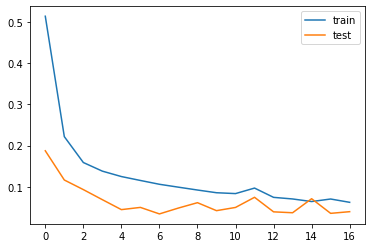

In [283]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()